# Statement of the Problem

The X education gets a lot of leads, but its lead conversion rate is very poor. Now, the company is looking for the more efficient process that it can improve the conversion rate. The company want identify the 'Hot Leads' that assures company will have prominent customers who can associate with the business.

In [1]:
## Necessary Library for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.shape

(9240, 37)

In [5]:
# Null values of each column
round(df.isnull().sum()/len(df) * 100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [6]:
# Drop the columns which has null value greater than 40%
df.drop(columns=['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                'Asymmetrique Profile Score'], axis=1, inplace=True)

In [7]:
# Again checking the Null Values in each columns
round((df.isnull().sum()/len(df) * 100).sort_values(ascending=False),2)

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Prospect ID                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free cop

In [8]:
# Let's treat the null values which has less than 40% rate
# Tags
mod_tag = df.Tags.mode()[0]
mod_tag

df.Tags.fillna(mod_tag, inplace=True)

In [9]:
# Lead Profile
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [10]:
# Since most of the lead Proile have categorise under Select which doesn't have any meaning.
# The null value can be assigned to other leads but still the data contains most of the irrelavent category
# We will drop the Lead Profile as it doesn't make much difference

df.drop('Lead Profile', axis=1, inplace=True)

In [11]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [12]:
# Since 'What matters most to you in choosing a course' is highly skewed data then will delete the column
df.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [13]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [14]:
# The column 'What is your current occupation' is having high number of Unemployed.
# We can make null value to merge with Unemployed category

mod_occu = df['What is your current occupation'].mode()[0]
mod_occu

df['What is your current occupation'].fillna(mod_occu, inplace=True)

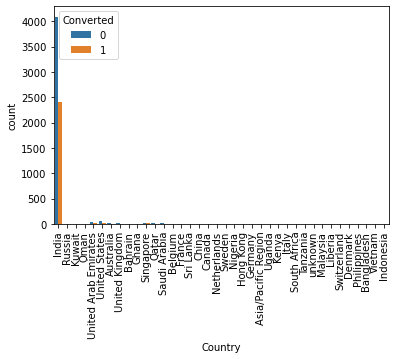

In [15]:
df.Country.value_counts()
sns.countplot(x='Country', hue='Converted',data=df)
plt.xticks(rotation=90)
plt.show()

In [16]:
# Country India has highest convert rate
# We can merge the null values to Country India

mod_coun = df.Country.mode()[0]
mod_coun

df.Country.fillna(mod_coun, inplace=True)

In [17]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [18]:
# Again column 'How did you hear about X Education' has highest value in the select column
# We can drop the column 'How did you hear about X Education'

df.drop('How did you hear about X Education', axis=1, inplace=True)

In [19]:
df.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

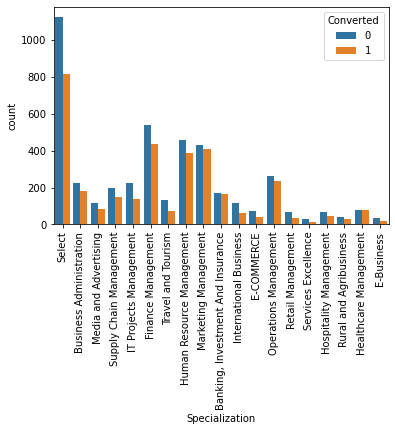

In [20]:
sns.countplot(x='Specialization', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

In [21]:
# Again Specilization column has highest number of value under select
# We can drop such column from the data set

#df.drop('Specialization', axis=1, inplace=True)

In [22]:
df.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [23]:
# We will assign the null values to Mumbai category

mod_city = df.City.mode()[0]
mod_city

df.City.fillna(mod_city, inplace=True)

In [24]:
# Drop those columns which has null value less than 2%

df.dropna(inplace=True)

In [25]:
round((df.isnull().sum()/len(df) * 100).sort_values(ascending=False),2)

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Specialization                              0.0
Country                                     0.0
Last Activity                               0.0
Page Views Per Visit                    

In [26]:
# Now let's understand the each column by recognising the different parameters

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7643 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               7643 non-null   object 
 1   Lead Number                               7643 non-null   int64  
 2   Lead Origin                               7643 non-null   object 
 3   Lead Source                               7643 non-null   object 
 4   Do Not Email                              7643 non-null   object 
 5   Do Not Call                               7643 non-null   object 
 6   Converted                                 7643 non-null   int64  
 7   TotalVisits                               7643 non-null   float64
 8   Total Time Spent on Website               7643 non-null   int64  
 9   Page Views Per Visit                      7643 non-null   float64
 10  Last Activity                       

In [27]:
df['Lead Origin'].value_counts()

Landing Page Submission    4834
API                        2201
Lead Add Form               581
Lead Import                  27
Name: Lead Origin, dtype: int64

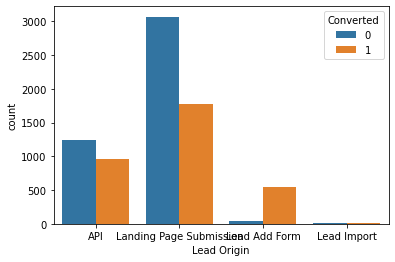

In [28]:
sns.countplot(x='Lead Origin', hue='Converted', data=df)
plt.show()

In [29]:
df['Lead Source'].value_counts()

Google               2514
Direct Traffic       2468
Organic Search       1035
Olark Chat            917
Reference             443
Welingak Website      129
Referral Sites         84
Facebook               28
google                  5
Click2call              4
bing                    3
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

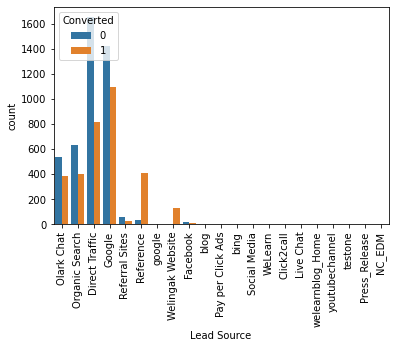

In [30]:
sns.countplot(x='Lead Source', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

In [31]:
# There are most 'Lead Score' values are having value in less numbers
# We can create the column 'Others' and merge all the 'Lead Score'

df['Lead Source'].replace(['bing','google','Click2call','Press_Release','Social Media','Live Chat',
                          'youtubechannel','testone','Pay per Click Ads','welearnblog_Home',
                          'WeLearn','blog','NC_EDM'], 'Others', inplace=True)

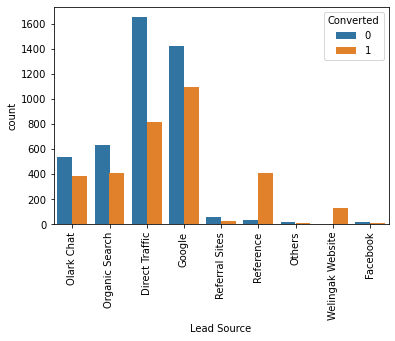

In [32]:
sns.countplot(x='Lead Source', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

In [33]:
df['Do Not Email'].value_counts()

No     7030
Yes     613
Name: Do Not Email, dtype: int64

In [34]:
df['Do Not Call'].value_counts()

No     7641
Yes       2
Name: Do Not Call, dtype: int64

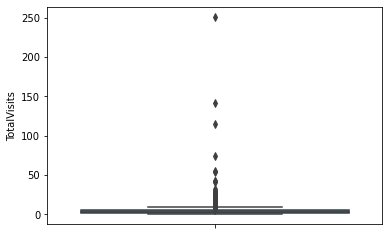

In [35]:
sns.boxplot(y='TotalVisits', data=df)
plt.show()

In [36]:
# As it is observed from the above plot that the TotalVisits has high number of outliers.
# Need to cap the outliers betweeen 5% to 95%

percentiles = df.TotalVisits.quantile([0.05, 0.95]).values

df.TotalVisits[df.TotalVisits <= percentiles[0]]= percentiles[0]
df.TotalVisits[df.TotalVisits >= percentiles[1]] = percentiles[1]

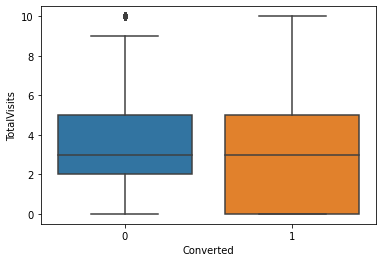

In [37]:
sns.boxplot(y='TotalVisits', x='Converted', data=df)
plt.show()

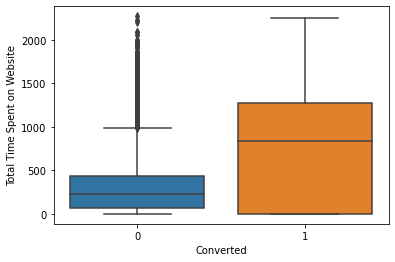

In [38]:
sns.boxplot(y='Total Time Spent on Website', x='Converted', data=df)
plt.show()

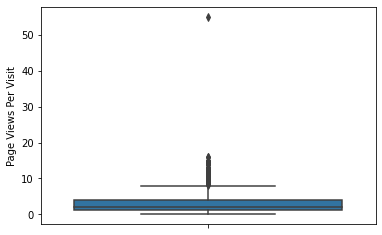

In [39]:
sns.boxplot(y='Page Views Per Visit', data=df)
plt.show()

In [40]:
# Again 'Page Views Per Visit' column has more number of values in the outliers
# We need to cap the outliers between 5% and 95%

percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values

df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

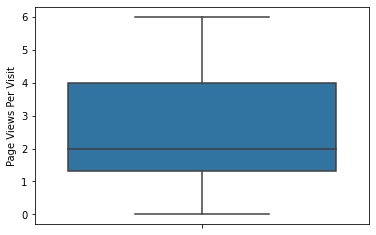

In [41]:
sns.boxplot(y='Page Views Per Visit', data=df)
plt.show()

In [42]:
df['Last Activity'].value_counts()

Email Opened                    2989
SMS Sent                        2524
Page Visited on Website          566
Olark Chat Conversation          463
Converted to Lead                350
Email Bounced                    257
Email Link Clicked               205
Form Submitted on Website        114
Unreachable                       86
Unsubscribed                      51
Had a Phone Conversation          24
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

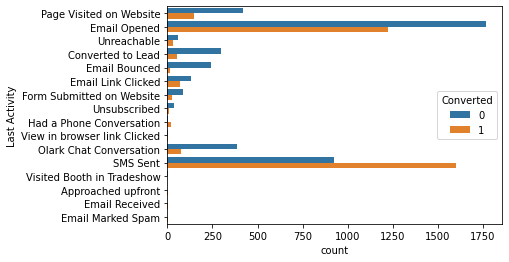

In [43]:
sns.countplot(y='Last Activity', hue='Converted', data=df)
plt.show()

In [44]:
# We can merege few activity that has less number of readings to 'Other Activity'

df['Last Activity'].replace(['View in browser link Clicked','Approached upfront','Email Received',
                            'Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],
                           'Other Activity', inplace=True)

In [45]:
df['Last Activity'].value_counts()

Email Opened                 2989
SMS Sent                     2524
Page Visited on Website       566
Olark Chat Conversation       463
Converted to Lead             350
Email Bounced                 257
Email Link Clicked            205
Form Submitted on Website     114
Unreachable                    86
Unsubscribed                   51
Had a Phone Conversation       24
Other Activity                 14
Name: Last Activity, dtype: int64

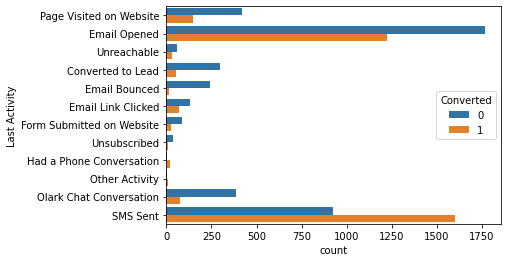

In [46]:
sns.countplot(y='Last Activity', hue='Converted', data=df)
plt.show()

In [47]:
df['What is your current occupation'].value_counts()

Unemployed              6746
Working Professional     673
Student                  193
Other                     15
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

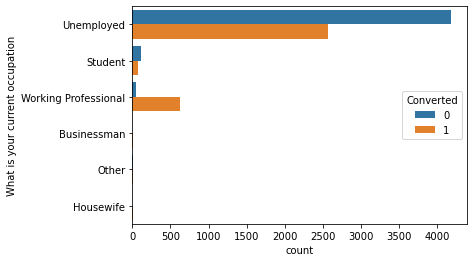

In [48]:
sns.countplot(y='What is your current occupation', hue='Converted', data=df)
plt.show()

In [49]:
df['What is your current occupation'].replace(['Other','Housewife','Businessman'], 'Others', inplace=True)

In [50]:
df['What is your current occupation'].value_counts()

Unemployed              6746
Working Professional     673
Student                  193
Others                    31
Name: What is your current occupation, dtype: int64

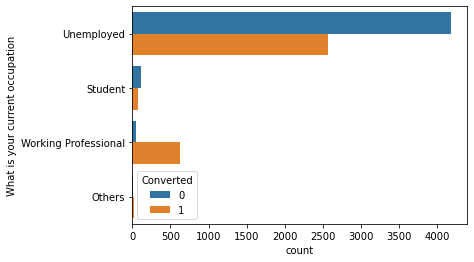

In [51]:
sns.countplot(y='What is your current occupation', hue='Converted', data=df)
plt.show()

In [52]:
df.Search.value_counts()

No     7631
Yes      12
Name: Search, dtype: int64

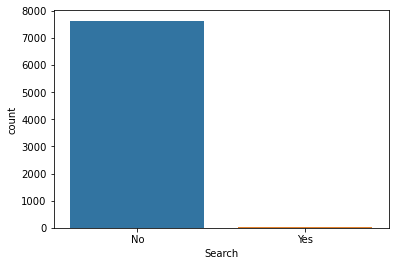

In [53]:
sns.countplot(x='Search', data=df)
plt.show()

In [54]:
# As search column has no contribution towards the leads, we can drop the column.
# Also, we could drop the column 'what is your current occupation' too as the number of entries are with Unemployment


In [55]:
df.Magazine.value_counts()

# We can drop the column Magazine as the number of entries are under No

No    7643
Name: Magazine, dtype: int64

In [56]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [57]:
df['Newspaper Article'].value_counts()

# We can drop the 'Newspaper Article' as the number of entries are more under No category

No     7641
Yes       2
Name: Newspaper Article, dtype: int64

In [58]:
df['X Education Forums'].value_counts()

# We can drop the 'X Education Forums' as the number of entries are more under No category

No     7642
Yes       1
Name: X Education Forums, dtype: int64

In [59]:
df.Newspaper.value_counts()

# We can drop the 'Newspaper' as the number of entries are more under No category

No     7642
Yes       1
Name: Newspaper, dtype: int64

In [60]:
df['Digital Advertisement'].value_counts()

# We can drop the 'Digital Advertisement' as the number of entries are more under No category

No     7639
Yes       4
Name: Digital Advertisement, dtype: int64

In [61]:
df['Through Recommendations'].value_counts()

# We can drop the 'Through Recommendations' as the number of entries are more under No category

No     7636
Yes       7
Name: Through Recommendations, dtype: int64

In [62]:
df['Receive More Updates About Our Courses'].value_counts()

# We can drop the 'Receive More Updates About Our Courses' as the number of entries are more under No category

No    7643
Name: Receive More Updates About Our Courses, dtype: int64

In [63]:
df.Tags.value_counts()

Will revert after reading the email                  3946
Ringing                                              1187
Interested in other courses                           483
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          164
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

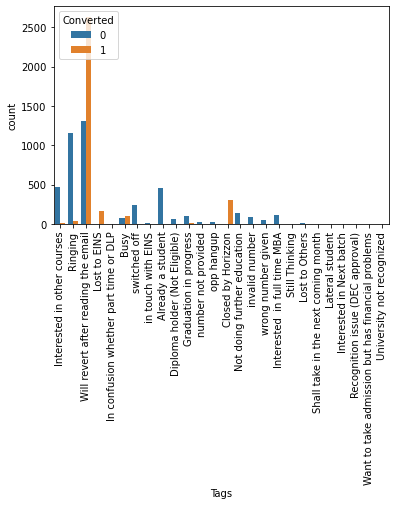

In [64]:
sns.countplot(x='Tags', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

# Tags can be removed because it was developed by marketing team for their own reference

In [65]:
df['Update me on Supply Chain Content'].value_counts()

# We can drop the 'Update me on Supply Chain Content' as the number of entries are more under No category

No    7643
Name: Update me on Supply Chain Content, dtype: int64

In [66]:
df['Get updates on DM Content'].value_counts()

# We can drop the 'Get updates on DM Content' as the number of entries are more under No category

No    7643
Name: Get updates on DM Content, dtype: int64

In [67]:
df.City.value_counts()

Mumbai                         3178
Select                         2156
Thane & Outskirts               742
Other Cities                    677
Other Cities of Maharashtra     441
Other Metro Cities              375
Tier II Cities                   74
Name: City, dtype: int64

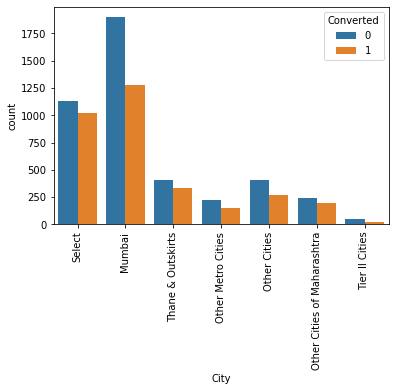

In [68]:
sns.countplot(x='City', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

In [69]:
df['I agree to pay the amount through cheque'].value_counts()

# We can drop the 'I agree to pay the amount through cheque' as the number of entries are more under No category

No    7643
Name: I agree to pay the amount through cheque, dtype: int64

In [70]:
df['A free copy of Mastering The Interview'].value_counts()

# We can drop the 'A free copy of Mastering The Interview' as the number of entries are more under No category

No     4757
Yes    2886
Name: A free copy of Mastering The Interview, dtype: int64

In [71]:
df['Last Notable Activity'].value_counts()

Modified                        2493
Email Opened                    2481
SMS Sent                        2037
Page Visited on Website          272
Email Link Clicked               129
Olark Chat Conversation           88
Email Bounced                     56
Unsubscribed                      38
Unreachable                       29
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

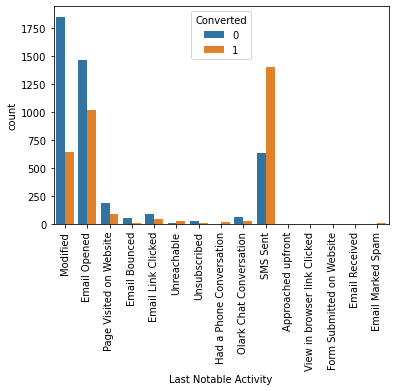

In [72]:
sns.countplot(x='Last Notable Activity',hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

In [73]:
# We can merge few of the categories to other activity as it contains less number of entries

df['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Approached upfront',
                                    'Resubscribed to emails','View in browser link Clicked','Form Submitted on Website',
                                    'Email Received'], 'Others Activity', inplace=True)

In [74]:
df['Last Notable Activity'].value_counts()

Modified                   2493
Email Opened               2481
SMS Sent                   2037
Page Visited on Website     272
Email Link Clicked          129
Olark Chat Conversation      88
Email Bounced                56
Unsubscribed                 38
Unreachable                  29
Others Activity              20
Name: Last Notable Activity, dtype: int64

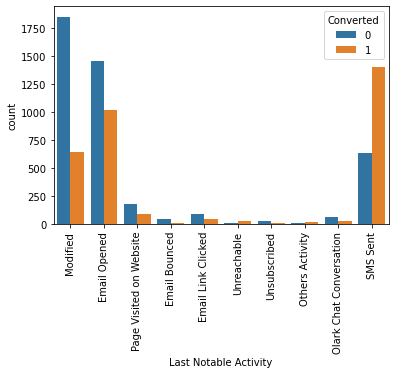

In [75]:
sns.countplot(x='Last Notable Activity',hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

### Dropping the Unwanted Columns

In [76]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [77]:
df.drop(['What is your current occupation','Search','Magazine','Newspaper Article','X Education Forums',
        'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
        'Tags','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
        'A free copy of Mastering The Interview'], axis=1, inplace=True)

In [78]:
df.shape

(7643, 15)

### Mapping the Binary Columns

In [79]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'City', 'Last Notable Activity'],
      dtype='object')

In [80]:
df['Do Not Email'] = df['Do Not Email'].map({'Yes':1, 'No':0})
df['Do Not Call'] = df['Do Not Call'].map({'Yes':1, 'No':0})

### Creating Dummy Columns

In [81]:
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Select,Select,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Email Opened


In [82]:
dum_col = ['Lead Origin','Lead Source','Last Activity','Specialization','City','Last Notable Activity']

In [83]:
dummy = pd.get_dummies(df[dum_col], drop_first=True, dtype=int)

In [84]:
df = pd.concat([df,dummy], axis=1)

In [85]:
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,1,0,0,0,0,0,0,0


In [86]:
df.shape

(7643, 70)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7643 entries, 0 to 9239
Data columns (total 70 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    7643 non-null   object 
 1   Lead Number                                    7643 non-null   int64  
 2   Lead Origin                                    7643 non-null   object 
 3   Lead Source                                    7643 non-null   object 
 4   Do Not Email                                   7643 non-null   int64  
 5   Do Not Call                                    7643 non-null   int64  
 6   Converted                                      7643 non-null   int64  
 7   TotalVisits                                    7643 non-null   float64
 8   Total Time Spent on Website                    7643 non-null   int64  
 9   Page Views Per Visit                           7643 

#### Dropping the Original Columns

In [88]:
df.drop(dum_col, axis=1, inplace=True)

In [89]:
df.shape

(7643, 64)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7643 entries, 0 to 9239
Data columns (total 64 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    7643 non-null   object 
 1   Lead Number                                    7643 non-null   int64  
 2   Do Not Email                                   7643 non-null   int64  
 3   Do Not Call                                    7643 non-null   int64  
 4   Converted                                      7643 non-null   int64  
 5   TotalVisits                                    7643 non-null   float64
 6   Total Time Spent on Website                    7643 non-null   int64  
 7   Page Views Per Visit                           7643 non-null   float64
 8   Country                                        7643 non-null   object 
 9   Lead Origin_Landing Page Submission            7643 

In [91]:
df.drop(['Lead Number'], axis=1, inplace=True)

In [92]:
df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,India,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,India,0,0,...,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,India,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,India,1,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,India,1,0,...,0,0,0,1,0,0,0,0,0,0


In [93]:
X = df.drop(['Prospect ID','Converted','Country'],axis=1)
y = df.Converted

In [94]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [95]:
X.shape, y.shape

((7643, 60), (7643,))

## Splitting the Data into Trian and Test

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100 )

In [97]:
print('Shape of X_train :', X_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of y_test :', y_test.shape)

Shape of X_train : (5350, 60)
Shape of X_test : (2293, 60)
Shape of y_train : (5350,)
Shape of y_test : (2293,)


## Data Standardisation

In [98]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 9023 to 6840
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Do Not Email                                   5350 non-null   int64  
 1   Do Not Call                                    5350 non-null   int64  
 2   TotalVisits                                    5350 non-null   float64
 3   Total Time Spent on Website                    5350 non-null   int64  
 4   Page Views Per Visit                           5350 non-null   float64
 5   Lead Origin_Landing Page Submission            5350 non-null   int32  
 6   Lead Origin_Lead Add Form                      5350 non-null   int32  
 7   Lead Origin_Lead Import                        5350 non-null   int32  
 8   Lead Source_Facebook                           5350 non-null   int32  
 9   Lead Source_Google                             53

In [100]:
# Converting standardised scaler data into dataframe

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [101]:
X_train_scaled.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
count,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,...,5350.000000,5350.000000,5350.000000,5350.00000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000
mean,0.082056,0.000374,0.351159,0.234430,0.416634,0.633084,0.077944,0.004299,0.004299,0.328224,...,0.009533,0.017383,0.324673,0.32243,0.012336,0.002991,0.033458,0.268037,0.004860,0.005794
std,0.274476,0.019333,0.277965,0.243792,0.293513,0.482008,0.268108,0.065432,0.065432,0.469611,...,0.097178,0.130707,0.468296,0.46745,0.110393,0.054610,0.179846,0.442979,0.069549,0.075907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.200000,0.025088,0.208333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.300000,0.129621,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.500000,0.446193,0.666667,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
X_test_scaled.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
count,2293.000000,2293.0,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,...,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,0.075883,0.0,0.351330,0.235717,0.421497,0.631051,0.071522,0.001744,0.002181,0.330571,...,0.010031,0.015700,0.324466,0.334932,0.009594,0.001744,0.040558,0.262974,0.001308,0.003053
std,0.264869,0.0,0.267974,0.244727,0.288417,0.482625,0.257751,0.041739,0.046656,0.470521,...,0.099671,0.124339,0.468277,0.472070,0.097501,0.041739,0.197307,0.440345,0.036155,0.055180
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.200000,0.031250,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.300000,0.131602,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.500000,0.438820,0.666667,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,0.991637,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building a Logistic Regression

In [103]:
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=20)
selector.fit(X_train_scaled, y_train)
selector.support_

array([ True, False,  True,  True,  True,  True,  True, False, False,
       False,  True, False, False,  True, False,  True, False, False,
        True, False,  True,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False,  True, False])

### Columns to Keep

In [326]:
cols_to_keep = X_train_scaled.columns[selector.support_]

In [327]:
cols_to_keep

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Specialization_Select',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [105]:
list(zip(X_train_scaled.columns, selector.support_, selector.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Others', False, 33),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Clicked', False, 35),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 21),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on Website', F

In [106]:
X_train = X_train_scaled[cols_to_keep]
X_test = X_test_scaled[cols_to_keep]

In [107]:
X_train.shape, X_test.shape

((5350, 20), (2293, 20))

In [108]:
# Adding constant to X_train and X_test
X_train_sm = sm.add_constant(X_train, has_constant='add')
X_test_sm = sm.add_constant(X_test, has_constant='add')

In [109]:
X_train_sm.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,...,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_SMS Sent,Specialization_Select,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
0,1.0,0.0,0.6,0.115317,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.4,0.098151,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.2,0.237236,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.1,0.129842,0.166667,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.2,0.658891,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [110]:
X_train_sm.shape

(5350, 21)

In [111]:
X_test_sm.shape

(2293, 21)

In [112]:
y_train.shape

(5350,)

In [113]:
y_test.shape

(2293,)

In [114]:
X_test_sm.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,...,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_SMS Sent,Specialization_Select,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
0,1.0,0.0,0.2,0.170335,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.3,0.197623,0.500000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.2,0.102553,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.4,0.724472,0.666667,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.842430,0.611667,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
# Build a Logistic Regression Model
model1 = sm.GLM(np.array(y_train), X_train_sm, family=sm.families.Binomial())
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5329
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2463.7
Date:                Sun, 19 May 2024   Deviance:                       4927.4
Time:                        21:30:30   Pearson chi2:                 5.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6505      0.198     -3.281      0.001      -1.039      -0.262
Do Not Email                                     -1.4710      0.180     -8.180      0.000      -1.823      -1.119
TotalVisits                                       1.0794      0.190      5.686      0.000       0.707       1.451
Total Time Spent on Website                       4.3903      0.168     26.136      0.000       4.061       4.720
Page Views Per Visit                             -0.9656      0.198     -4.877      0.000      -1.354      -0.578
Lead Origin_Landing Page Submission              -1.1250      0.127     -8.843      0.000      -1.374      -0.876
Lead Origin_Lead Add Form                         1.9442      1.131      1.718      0.086      -0.273       4.162
Lead Source_Olark Chat                            1.2822      0.154      8.307      0.000       0.980       1.585
Lead Source_Reference                             1.4636      1.149      1.274      0.203      -0.788       3.715
Lead Source_Welingak Website                      3.4610      1.339      2.584      0.010       0.836       6.086
Last Activity_Email Opened                        1.0331      0.170      6.092      0.000       0.701       1.365
Last Activity_Had a Phone Conversation            2.2126      0.624      3.545      0.000       0.989       3.436
Last Activity_Olark Chat Conversation            -0.4372      0.227     -1.926      0.054      -0.882       0.008
Last Activity_Other Activity                      1.8939      0.949      1.996      0.046       0.034       3.753
Last Activity_SMS Sent                            1.1505      0.131      8.775      0.000       0.894       1.407
Specialization_Select                            -1.1090      0.129     -8.610      0.000      -1.361      -0.857
Last Notable Activity_Email Link Clicked         -0.7242      0.295     -2.456      0.014      -1.302      -0.146
Last Notable Activity_Email Opened               -1.1802      0.187     -6.302      0.000      -1.547      -0.813
Last Notable Activity_Modified                   -1.1955      0.123     -9.728      0.000      -1.436      -0.955
Last Notable Activity_Olark Chat Conversation    -0.8869      0.420     -2.114      0.034      -1.709      -0.065
Last Notable Activity_Unreachable                 1.7152      0.538      3.189      0.001       0.661       2.769
=================================================================================================================
"""

In [116]:
# Since p-value of 'Lead Source_Reference' is high then we will delete the column

X_train_sm.drop(['Lead Source_Reference'], axis=1, inplace=True)
X_test_sm.drop(['Lead Source_Reference'], axis=1, inplace=True)

In [117]:
model2 = sm.GLM(np.array(y_train), X_train_sm, family=sm.families.Binomial())
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5330
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2464.3
Date:                Sun, 19 May 2024   Deviance:                       4928.6
Time:                        21:30:30   Pearson chi2:                 5.46e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6510      0.198     -3.285      0.001      -1.040      -0.263
Do Not Email                                     -1.4691      0.180     -8.176      0.000      -1.821      -1.117
TotalVisits                                       1.0792      0.190      5.685      0.000       0.707       1.451
Total Time Spent on Website                       4.3894      0.168     26.133      0.000       4.060       4.719
Page Views Per Visit                             -0.9659      0.198     -4.879      0.000      -1.354      -0.578
Lead Origin_Landing Page Submission              -1.1251      0.127     -8.845      0.000      -1.374      -0.876
Lead Origin_Lead Add Form                         3.3698      0.258     13.049      0.000       2.864       3.876
Lead Source_Olark Chat                            1.2806      0.154      8.294      0.000       0.978       1.583
Lead Source_Welingak Website                      2.0339      0.758      2.682      0.007       0.547       3.520
Last Activity_Email Opened                        1.0335      0.169      6.098      0.000       0.701       1.366
Last Activity_Had a Phone Conversation            2.2123      0.624      3.545      0.000       0.989       3.435
Last Activity_Olark Chat Conversation            -0.4374      0.227     -1.927      0.054      -0.882       0.007
Last Activity_Other Activity                      1.8949      0.948      1.998      0.046       0.036       3.753
Last Activity_SMS Sent                            1.1510      0.131      8.782      0.000       0.894       1.408
Specialization_Select                            -1.1085      0.129     -8.609      0.000      -1.361      -0.856
Last Notable Activity_Email Link Clicked         -0.7201      0.295     -2.444      0.015      -1.298      -0.143
Last Notable Activity_Email Opened               -1.1801      0.187     -6.305      0.000      -1.547      -0.813
Last Notable Activity_Modified                   -1.1936      0.123     -9.718      0.000      -1.434      -0.953
Last Notable Activity_Olark Chat Conversation    -0.8844      0.419     -2.109      0.035      -1.706      -0.063
Last Notable Activity_Unreachable                 1.7163      0.538      3.191      0.001       0.662       2.770
=================================================================================================================
"""

In [118]:
# Since p-value of 'Last Activity_Olark Chat Conversation' is high then we will delete the column

X_train_sm.drop(['Last Activity_Olark Chat Conversation'], axis=1, inplace=True)
X_test_sm.drop(['Last Activity_Olark Chat Conversation'], axis=1, inplace=True)

In [119]:
model3 = sm.GLM(np.array(y_train), X_train_sm, family=sm.families.Binomial())
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5331
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2466.2
Date:                Sun, 19 May 2024   Deviance:                       4932.5
Time:                        21:30:30   Pearson chi2:                 5.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7092      0.197     -3.607      0.000      -1.095      -0.324
Do Not Email                                     -1.4310      0.179     -7.984      0.000      -1.782      -1.080
TotalVisits                                       1.0823      0.190      5.695      0.000       0.710       1.455
Total Time Spent on Website                       4.3948      0.168     26.120      0.000       4.065       4.725
Page Views Per Visit                             -0.9850      0.198     -4.973      0.000      -1.373      -0.597
Lead Origin_Landing Page Submission              -1.1139      0.127     -8.771      0.000      -1.363      -0.865
Lead Origin_Lead Add Form                         3.3735      0.258     13.061      0.000       2.867       3.880
Lead Source_Olark Chat                            1.2330      0.152      8.120      0.000       0.935       1.531
Lead Source_Welingak Website                      2.0361      0.758      2.685      0.007       0.550       3.523
Last Activity_Email Opened                        1.1481      0.160      7.181      0.000       0.835       1.461
Last Activity_Had a Phone Conversation            2.2945      0.624      3.679      0.000       1.072       3.517
Last Activity_Other Activity                      1.9994      0.953      2.098      0.036       0.132       3.867
Last Activity_SMS Sent                            1.2219      0.127      9.646      0.000       0.974       1.470
Specialization_Select                            -1.1175      0.128     -8.716      0.000      -1.369      -0.866
Last Notable Activity_Email Link Clicked         -0.6533      0.293     -2.230      0.026      -1.228      -0.079
Last Notable Activity_Email Opened               -1.2302      0.186     -6.623      0.000      -1.594      -0.866
Last Notable Activity_Modified                   -1.2397      0.121    -10.243      0.000      -1.477      -1.003
Last Notable Activity_Olark Chat Conversation    -1.2426      0.375     -3.310      0.001      -1.978      -0.507
Last Notable Activity_Unreachable                 1.7755      0.536      3.310      0.001       0.724       2.827
=================================================================================================================
"""

### Calculation of VIF

In [120]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_sm.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,30.630618
1,Do Not Email,1.153745
2,TotalVisits,2.378952
3,Total Time Spent on Website,1.245050
4,Page Views Per Visit,2.817941
5,Lead Origin_Landing Page Submission,2.969607
6,Lead Origin_Lead Add Form,2.207898
7,Lead Source_Olark Chat,1.993816
8,Lead Source_Welingak Website,1.372646
9,Last Activity_Email Opened,4.983509


In [121]:
# Since VIF of 'Last Notable Activity_Email Opened' column is higher than 5 then we will drop this column

X_train_sm.drop(['Last Notable Activity_Email Opened'], axis=1, inplace=True)
X_test_sm.drop(['Last Notable Activity_Email Opened'], axis=1, inplace=True)

In [122]:
model4 = sm.GLM(np.array(y_train), X_train_sm, family=sm.families.Binomial())
result4 = model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5332
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2487.9
Date:                Sun, 19 May 2024   Deviance:                       4975.8
Time:                        21:30:30   Pearson chi2:                 5.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1273      0.187     -6.036      0.000      -1.493      -0.761
Do Not Email                                     -1.3606      0.178     -7.645      0.000      -1.709      -1.012
TotalVisits                                       1.1689      0.189      6.190      0.000       0.799       1.539
Total Time Spent on Website                       4.4036      0.168     26.278      0.000       4.075       4.732
Page Views Per Visit                             -1.0219      0.197     -5.185      0.000      -1.408      -0.636
Lead Origin_Landing Page Submission              -1.1025      0.127     -8.709      0.000      -1.351      -0.854
Lead Origin_Lead Add Form                         3.4014      0.258     13.202      0.000       2.896       3.906
Lead Source_Olark Chat                            1.2643      0.151      8.365      0.000       0.968       1.561
Lead Source_Welingak Website                      1.9631      0.758      2.590      0.010       0.477       3.449
Last Activity_Email Opened                        0.4162      0.119      3.511      0.000       0.184       0.649
Last Activity_Had a Phone Conversation            2.4250      0.610      3.975      0.000       1.229       3.621
Last Activity_Other Activity                      2.0350      0.925      2.200      0.028       0.222       3.848
Last Activity_SMS Sent                            1.5051      0.119     12.619      0.000       1.271       1.739
Specialization_Select                            -1.0980      0.128     -8.594      0.000      -1.348      -0.848
Last Notable Activity_Email Link Clicked         -0.2765      0.288     -0.961      0.336      -0.840       0.287
Last Notable Activity_Modified                   -0.7416      0.094     -7.883      0.000      -0.926      -0.557
Last Notable Activity_Olark Chat Conversation    -0.8751      0.372     -2.355      0.019      -1.603      -0.147
Last Notable Activity_Unreachable                 2.1592      0.533      4.049      0.000       1.114       3.204
=================================================================================================================
"""

In [182]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_sm.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,27.223856
1,Do Not Email,1.150859
2,TotalVisits,2.367344
3,Total Time Spent on Website,1.242546
4,Page Views Per Visit,2.815143
5,Lead Origin_Landing Page Submission,2.969597
6,Lead Origin_Lead Add Form,2.204801
7,Lead Source_Olark Chat,1.990904
8,Lead Source_Welingak Website,1.372453
9,Last Activity_Email Opened,2.559502


In [183]:
# Since VIF of 'Last Notable Activity_Email Link Clicked' column is higher than 5 then we will drop this column

X_train_sm.drop(['Last Notable Activity_Email Link Clicked'], axis=1, inplace=True)
X_test_sm.drop(['Last Notable Activity_Email Link Clicked'], axis=1, inplace=True)

In [184]:
model5 = sm.GLM(np.array(y_train), X_train_sm, family=sm.families.Binomial())
result5 = model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5333
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2488.4
Date:                Mon, 20 May 2024   Deviance:                       4976.7
Time:                        11:34:09   Pearson chi2:                 5.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1705      0.181     -6.452      0.000      -1.526      -0.815
Do Not Email                                     -1.3454      0.177     -7.584      0.000      -1.693      -0.998
TotalVisits                                       1.1735      0.189      6.216      0.000       0.804       1.544
Total Time Spent on Website                       4.4025      0.168     26.277      0.000       4.074       4.731
Page Views Per Visit                             -1.0244      0.197     -5.198      0.000      -1.411      -0.638
Lead Origin_Landing Page Submission              -1.1037      0.127     -8.718      0.000      -1.352      -0.856
Lead Origin_Lead Add Form                         3.3854      0.257     13.184      0.000       2.882       3.889
Lead Source_Olark Chat                            1.2612      0.151      8.347      0.000       0.965       1.557
Lead Source_Welingak Website                      1.9649      0.758      2.592      0.010       0.479       3.450
Last Activity_Email Opened                        0.4569      0.111      4.117      0.000       0.239       0.674
Last Activity_Had a Phone Conversation            2.4561      0.609      4.035      0.000       1.263       3.649
Last Activity_Other Activity                      2.0631      0.923      2.234      0.025       0.253       3.873
Last Activity_SMS Sent                            1.5438      0.113     13.716      0.000       1.323       1.764
Specialization_Select                            -1.0963      0.128     -8.581      0.000      -1.347      -0.846
Last Notable Activity_Modified                   -0.7182      0.091     -7.907      0.000      -0.896      -0.540
Last Notable Activity_Olark Chat Conversation    -0.8316      0.369     -2.255      0.024      -1.554      -0.109
Last Notable Activity_Unreachable                 2.2022      0.531      4.145      0.000       1.161       3.243
=================================================================================================================
"""

In [227]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_sm.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,25.866052
1,Do Not Email,1.134102
2,TotalVisits,2.366804
3,Total Time Spent on Website,1.242511
4,Page Views Per Visit,2.814928
5,Lead Origin_Landing Page Submission,2.969180
6,Lead Origin_Lead Add Form,2.201671
7,Lead Source_Olark Chat,1.990431
8,Lead Source_Welingak Website,1.372450
9,Last Activity_Email Opened,2.285648


In [228]:
X_train_sm.drop(['Last Notable Activity_Olark Chat Conversation'], axis=1, inplace=True)
X_test_sm.drop(['Last Notable Activity_Olark Chat Conversation'], axis=1, inplace=True)

In [229]:
model6 = sm.GLM(np.array(y_train), X_train_sm, family=sm.families.Binomial())
result6 = model6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5334
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2491.1
Date:                Mon, 20 May 2024   Deviance:                       4982.2
Time:                        11:42:30   Pearson chi2:                 5.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.2390      0.179     -6.916      0.000      -1.590      -0.888
Do Not Email                              -1.3247      0.177     -7.472      0.000      -1.672      -0.977
TotalVisits                                1.1708      0.189      6.199      0.000       0.801       1.541
Total Time Spent on Website                4.3924      0.167     26.229      0.000       4.064       4.721
Page Views Per Visit                      -1.0262      0.197     -5.208      0.000      -1.412      -0.640
Lead Origin_Landing Page Submission       -1.0975      0.127     -8.676      0.000      -1.345      -0.850
Lead Origin_Lead Add Form                  3.3797      0.257     13.171      0.000       2.877       3.883
Lead Source_Olark Chat                     1.2477      0.151      8.273      0.000       0.952       1.543
Lead Source_Welingak Website               1.9760      0.758      2.607      0.009       0.490       3.462
Last Activity_Email Opened                 0.5228      0.107      4.865      0.000       0.312       0.733
Last Activity_Had a Phone Conversation     2.5057      0.607      4.128      0.000       1.316       3.695
Last Activity_Other Activity               2.1119      0.922      2.291      0.022       0.305       3.919
Last Activity_SMS Sent                     1.6060      0.110     14.659      0.000       1.391       1.821
Specialization_Select                     -1.1008      0.128     -8.621      0.000      -1.351      -0.851
Last Notable Activity_Modified            -0.6794      0.089     -7.619      0.000      -0.854      -0.505
Last Notable Activity_Unreachable          2.2705      0.530      4.284      0.000       1.232       3.309
==========================================================================================================
"""

In [230]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_sm.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,25.256191
1,Do Not Email,1.129487
2,TotalVisits,2.366658
3,Total Time Spent on Website,1.241765
4,Page Views Per Visit,2.814681
5,Lead Origin_Landing Page Submission,2.967833
6,Lead Origin_Lead Add Form,2.201352
7,Lead Source_Olark Chat,1.985003
8,Lead Source_Welingak Website,1.372219
9,Last Activity_Email Opened,2.149394


### Predicting the Variable

In [124]:
X_train_sm.columns

Index(['const', 'Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Specialization_Select', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [231]:
y_pred = result6.predict(X_train_sm)

In [232]:
y_train_pred = y_pred.values.reshape(-1)

In [233]:
y_train_pred[:5]

array([0.0553924 , 0.07858117, 0.11088061, 0.07588981, 0.79838639])

In [279]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.055392,9023
1,0,0.078581,32
2,0,0.110881,1095
3,0,0.075890,4082
4,0,0.798386,1248


### Mapping the Probabilty to binary values

In [280]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x : 1 if x>0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.055392,9023,0
1,0,0.078581,32,0
2,0,0.110881,1095,0
3,0,0.075890,4082,0
4,0,0.798386,1248,1


## Confusion Matrix

In [282]:
metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)

array([[2545,  461],
       [ 687, 1657]], dtype=int64)

### Accuracy

In [283]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7854205607476635

### Recall

In [284]:
metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7069112627986348

### Precision

In [285]:
metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7823418319169028

### ROC - Curve

In [286]:
fpr, tpr, threshold = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate=False)

In [287]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

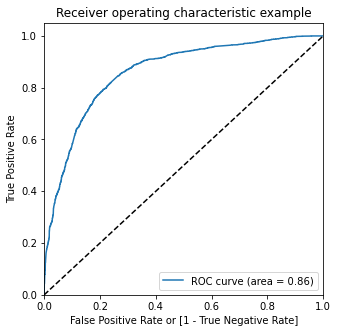

In [288]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [289]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_Prob.map(lambda x : 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,Final_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.055392,9023,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.078581,32,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0.110881,1095,0,0,1,1,0,0,0,0,0,0,0,0
3,0,0.075890,4082,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0.798386,1248,1,1,1,1,1,1,1,1,1,1,0,0


In [290]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.438131  1.000000  0.000000
0.1   0.1  0.557196  0.977816  0.229208
0.2   0.2  0.700561  0.936433  0.516633
0.3   0.3  0.766542  0.889932  0.670326
0.4   0.4  0.789907  0.791382  0.788756
0.5   0.5  0.785421  0.706911  0.846640
0.6   0.6  0.774953  0.633106  0.885562
0.7   0.7  0.740561  0.505973  0.923486
0.8   0.8  0.704860  0.380973  0.957418
0.9   0.9  0.645794  0.213311  0.983034


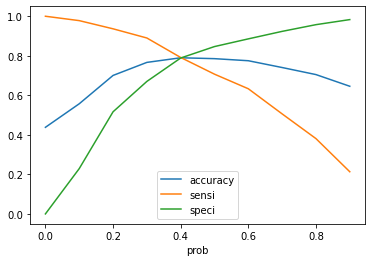

In [291]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### The optimal Cutoff point can be 0.4 from the above curve

In [292]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x : 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,Final_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.055392,9023,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.078581,32,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0.110881,1095,0,0,1,1,0,0,0,0,0,0,0,0
3,0,0.075890,4082,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0.798386,1248,1,1,1,1,1,1,1,1,1,1,0,0


### Accuracy after Probabiltiy of 0.4

In [293]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.7899065420560748

### Recall after Probability of 0.4

In [294]:
metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.7913822525597269

### Precision after Probability of 0.4

In [295]:
metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.7449799196787149

### Confusion_matrics after Probability of 0.4

In [296]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
confusion

array([[2371,  635],
       [ 489, 1855]], dtype=int64)

In [297]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

### Sensitivity

In [298]:
TP/float(TP+FN)

0.7913822525597269

### Specificity

In [299]:
TN/float(TN+FP)

0.7887558216899534

### Threshold

In [300]:
p,r,threshold = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

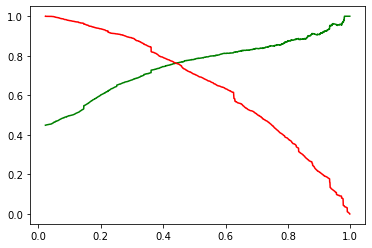

In [301]:
plt.plot(threshold, p[:-1], "g-")
plt.plot(threshold, r[:-1], "r-")
plt.show()

### Obtain the results of X_test data set to compare the results

In [302]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_SMS Sent,Specialization_Select,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
0,0.0,0.2,0.170335,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.3,0.197623,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.2,0.102553,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.4,0.724472,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.842430,0.611667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [303]:
X_test.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_SMS Sent,Specialization_Select,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,0.075883,0.351330,0.235717,0.421497,0.631051,0.071522,0.117314,0.057567,0.012647,0.394243,0.002617,0.055386,0.002617,0.325774,0.245530,0.015700,0.324466,0.334932,0.009594,0.001308
std,0.264869,0.267974,0.244727,0.288417,0.482625,0.257751,0.321864,0.232973,0.111771,0.488794,0.051097,0.228782,0.051097,0.468766,0.430495,0.124339,0.468277,0.472070,0.097501,0.036155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.200000,0.031250,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.300000,0.131602,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.500000,0.438820,0.666667,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,0.991637,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [304]:
X_test_sm.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_Other Activity,Last Activity_SMS Sent,Specialization_Select,Last Notable Activity_Modified,Last Notable Activity_Unreachable
0,1.0,0.0,0.2,0.170335,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.3,0.197623,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.2,0.102553,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.4,0.724472,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.842430,0.611667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [305]:
y_test_pred = result6.predict(X_test_sm)

In [306]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:5]

array([0.13554635, 0.49390922, 0.40419778, 0.90341866, 0.9710514 ])

In [309]:
y_test_pred_final = pd.DataFrame({'Converted': y_test.values, 'Converted_Prob': y_test_pred})
y_test_pred_final['Prospect ID'] = y_test.index
y_test_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.135546,3879
1,1,0.493909,4168
2,0,0.404198,7510
3,1,0.903419,2935
4,1,0.971051,7245


In [310]:
y_test_pred_final['Final_Predicted'] = y_test_pred_final.Converted_Prob.map(lambda x : 1 if x>0.4 else 0)
y_test_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Final_Predicted
0,0,0.135546,3879,0
1,1,0.493909,4168,1
2,0,0.404198,7510,1
3,1,0.903419,2935,1
4,1,0.971051,7245,1


### Accuracy of test data set for 0.4 probability

In [311]:
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)

0.7775839511556912

### Recall of test data set for 0.4 probability

In [312]:
metrics.recall_score(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)

0.7819148936170213

### Precision of test data set for 0.4 probability

In [313]:
metrics.precision_score(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)

0.7067307692307693

### Assigning the Lead Score to Testing Data

In [328]:
y_test_pred_final['Lead Score'] = y_test_pred_final.Converted_Prob.map(lambda x  : round(x*100))

y_test_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Final_Predicted,Lead Score
0,0,0.135546,3879,0,14
1,1,0.493909,4168,1,49
2,0,0.404198,7510,1,40
3,1,0.903419,2935,1,90
4,1,0.971051,7245,1,97


In [329]:
y_test_pred_final.shape

(2293, 5)

In [315]:
confusion1 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)
confusion1

array([[1048,  305],
       [ 205,  735]], dtype=int64)

In [316]:
TP = confusion1[1,1] # true positive
TN = confusion1[0,0] # true negative
FP = confusion1[0,1] # false positive
FN = confusion1[1,0] # false negative

### Sensitivity

In [317]:
TP / float(TP+FN)

0.7819148936170213

### Specificity

In [318]:
TN / float(TN+FP)

0.7745750184774575

### Result Obtain on Train and Test Data

#### Train Data

    * Accuracy = 78.99
    * Recall(True Positive Rate) = 79.14
    * Precision(Positive Predictive Value) = 74.50
    * Sensitivity(True Positive Rate) = 79.14
    * Specificity(True Negative Rate) = 78.87

#### Test Data
    
    * Accuracy = 77.76
    * Recall(True Positive Rate) = 78.19
    * Precision(Positive Predictive Value) = 70.67
    * Sensitivity(True Positive Rate) = 78.19
    * Specificity(True Negative Rate) = 77.45

### Obtainin the Hot Leads

In [319]:
hot_lead = y_test_pred_final.loc[y_test_pred_final['Lead Score']>=85]
hot_lead

,Converted,Converted_Prob,Prospect ID,Final_Predicted,Lead Score
3,1,0.903419,2935,1,90
4,1,0.971051,7245,1,97
14,1,0.934839,4330,1,93
17,1,0.875008,8977,1,88
19,1,0.889400,3265,1,89
...,...,...,...,...,...
2238,1,0.967947,2497,1,97
2254,1,0.928516,3085,1,93
2261,1,0.983538,8043,1,98
2273,1,0.976947,4050,1,98


In [322]:
hot_lead_ids = hot_lead['Prospect ID'].values

### Customer to be Contacted as per the Hot Leads

In [321]:
hot_lead_ids

array([2935, 7245, 4330, 8977, 3265, 7096,  374, 2154, 3069, 4971, 1423,
       1068, 8325, 2271, 4803, 5210, 2907, 8786,   91, 5692, 5346, 8204,
       3535, 7805,  936, 5819, 4531,  556, 1979, 8888, 8073, 7265, 4505,
       7240, 6736, 4213, 3287, 4057, 8123, 3152, 1046, 6989, 5700, 1682,
       8190, 6125, 6723, 3182, 6636, 2055, 8112, 7356, 3384, 7696, 5525,
       3532, 5000, 5785, 7991, 7674,  178, 4488, 2812, 1565, 5509, 5697,
       8541, 2575, 6705,  746, 4947, 2163, 7008, 5815,  874, 7682, 2014,
       1116,   12, 7259, 6094,  560, 7040, 4481, 3671, 6015, 8641, 4407,
        449, 4371, 3496, 5455, 5817, 7733,  137,  807, 7641, 5292, 4498,
       2659, 2337, 2153, 2196, 4359, 1332, 6421, 2664, 2653, 1747, 4826,
       2960,  775, 4374, 6193, 5979, 1663, 5804,  819, 1783, 2009, 7683,
       4461, 4212, 2343, 1710, 4830, 4610, 3113, 6458, 4771, 4773, 4766,
       3758, 8429, 1051, 1009, 4634, 1614, 9108, 6567, 3522, 4717, 6450,
       3917, 3321, 7211, 8174, 2341, 4569, 5448, 69

### Finiding out the Important Features

In [325]:
result6.params.sort_values(ascending=False)

Total Time Spent on Website               4.392359
Lead Origin_Lead Add Form                 3.379660
Last Activity_Had a Phone Conversation    2.505693
Last Notable Activity_Unreachable         2.270459
Last Activity_Other Activity              2.111941
Lead Source_Welingak Website              1.975983
Last Activity_SMS Sent                    1.605957
Lead Source_Olark Chat                    1.247731
TotalVisits                               1.170842
Last Activity_Email Opened                0.522848
Last Notable Activity_Modified           -0.679392
Page Views Per Visit                     -1.026165
Lead Origin_Landing Page Submission      -1.097524
Specialization_Select                    -1.100788
const                                    -1.239000
Do Not Email                             -1.324706
dtype: float64